In [4]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 


In [7]:
df = pd.read_csv("student_scores.csv")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [8]:
df.shape

(25, 2)

In [9]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


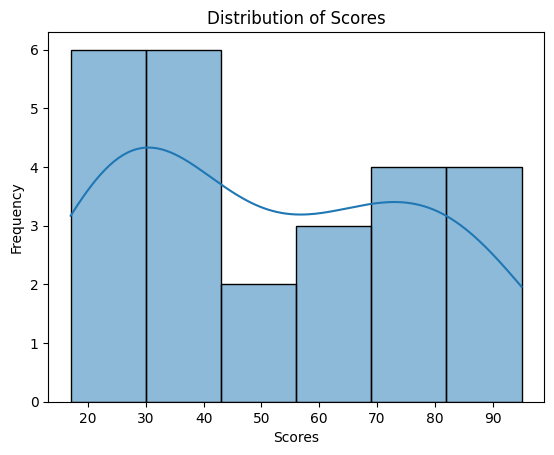

In [22]:
# Plotting the distribution of scores
sns.histplot(df['Scores'], kde=True)
plt.title('Distribution of Scores')
plt.xlabel('Scores')
plt.ylabel('Frequency')
plt.show()

C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


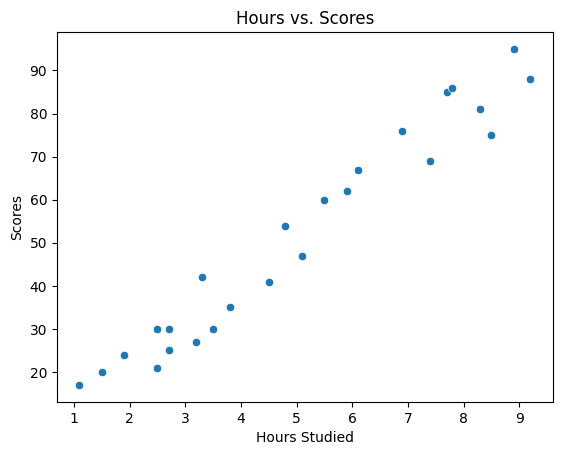

In [23]:
sns.scatterplot(x='Hours', y='Scores', data=df)
plt.title('Hours vs. Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Scores')
plt.show()

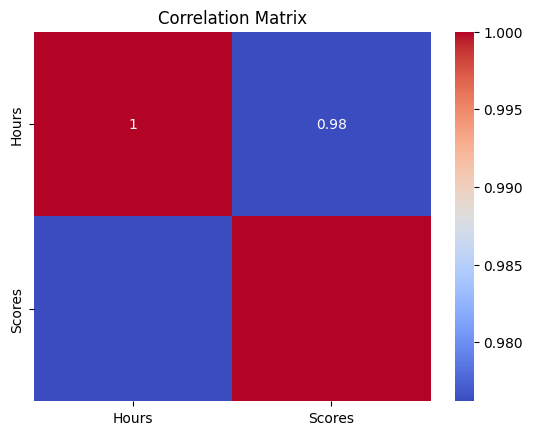

In [24]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [25]:
X = df[['Hours']].values
y = df['Scores'].values

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [28]:
#linear regresson 
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

LinearRegression()

In [31]:
lr_prediction = lr_model.predict(X_test)
print(lr_prediction)


[[83.18814104]
 [27.03208774]
 [27.03208774]
 [69.63323162]
 [59.95115347]]


In [32]:
r2 = r2_score(y_test, lr_prediction)
mse = mean_squared_error(y_test, lr_prediction)
rmse = np.sqrt(mse)

In [33]:
print(f"R-squared: {r2}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

R-squared: 0.9678055545167994
Mean Squared Error: 18.943211722315272
Root Mean Squared Error: 4.352380006653288


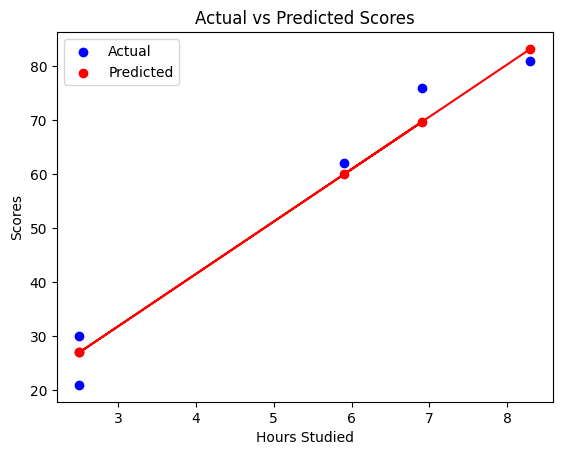

In [34]:
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, lr_prediction, color='red', label='Predicted')
plt.plot(X_test, lr_prediction, color='red')
plt.title('Actual vs Predicted Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Scores')
plt.legend()
plt.show()

In [35]:
cv_scores = cross_val_score(lr_model, X, y, cv=5, scoring='neg_mean_absolute_error')
mean_cv_score = np.abs(np.mean(cv_scores))

print(f"Mean Cross-Validation MAE: {mean_cv_score}")

Mean Cross-Validation MAE: 5.701180786326049
